<a href="https://colab.research.google.com/github/Ayeshanadaf796/British-Airways---Data-Science-Job-Simulation-Project/blob/main/British_Airways_Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**Predictive Modelling Of Customer Bookings**

Exploratory Data Analysis

In [ ]:
data = pd.read_csv('/content/customer_booking (1).csv',encoding='latin1')

In [ ]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
data.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


Data Conversions

In [ ]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}


In [ ]:
data['flight_day'] = data['flight_day'].map(mapping)

In [ ]:
data['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Columns and Feature Importance Score

In [ ]:
#Calculating feature importance score
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
fi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
fi_df = pd.DataFrame({
    "Columns": X.columns,
    "Feature_Importance_Score": fi_scores
})
fi_df = fi_df.sort_values(by="Feature_Importance_Score", ascending=False)
fi_df



,Columns,Feature_Importance_Score
818,booking_origin_Australia,0.024184
865,booking_origin_Malaysia,0.021950
7,flight_duration,0.020183
2,length_of_stay,0.009725
721,route_PEKSBW,0.009071
...,...,...
127,route_CGKPER,0.000000
529,route_KCHKIX,0.000000
531,route_KCHMEL,0.000000
532,route_KCHMRU,0.000000


**Random Forest Classifier Model For Prediction**

In [ ]:
# Lightweight Random Forest Training (Booking Completion)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/content/customer_booking (1).csv",encoding='latin1')

target = "booking_complete"
df = df.dropna(subset=[target])
df = pd.get_dummies(df, drop_first=True)

X = df.drop(target, axis=1)
y = df[target]

# If dataset is huge, sample for testing
if len(df) > 10000:
    df = df.sample(10000, random_state=42)  # take 10k rows
    X = df.drop(target, axis=1)
    y = df[target]

#train -test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Random forest model(Lightweight)
model = RandomForestClassifier(
    n_estimators=100,      # fewer trees (faster)
    max_depth=15,          # limit depth
    max_features="sqrt",   # fewer features per split
    n_jobs=-1,             # use all CPUs
    random_state=42,
    class_weight="balanced"
)


#Training final model
model.fit(X_train, y_train)




# Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Predictions
y_pred = model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Cross-validation scores: [0.74115177 0.74827483 0.75577558]
Mean CV Accuracy: 0.748400724895525

Test Accuracy: 0.7435

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      1704
           1       0.30      0.57      0.40       296

    accuracy                           0.74      2000
   macro avg       0.61      0.67      0.62      2000
weighted avg       0.82      0.74      0.77      2000



Heat Map - Confusion Matrix

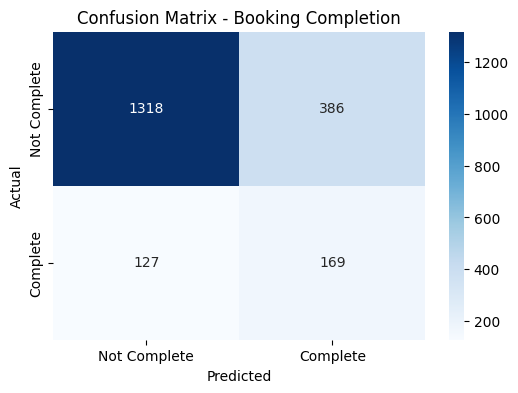

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Complete", "Complete"],
            yticklabels=["Not Complete", "Complete"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Booking Completion")
plt.show()


Feature Importance Plot

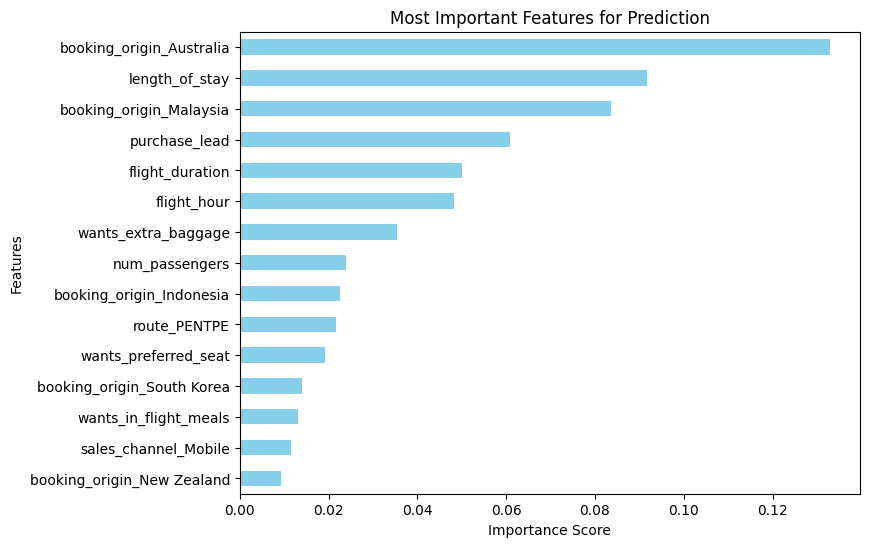

In [ ]:
# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,6))
feat_imp.nlargest(15).sort_values(ascending=True).plot(kind="barh", color="skyblue")
plt.title("Most Important Features for Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Conclusion**

1. The most important variable in the model was booking_origin_Australia, showing that whether a booking originated in Australia had the strongest influence on predictions.

2. Other significant factors included length_of_stay, booking_origin_Malaysia, and purchase_lead, while variables such as sales_channel_Mobile and booking_origin_New Zealand contributed little to the model.

3. The accuracy of the model was approximately 0.74 (both test and cross-validation), indicating reasonably consistent performance across datasets. However, the model may benefit from further refinement.